In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import mglearn 
%matplotlib inline

# Metrics for Binary classification


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits=load_digits()
y=digits.target==9

X_train,X_test,y_train,y_test=train_test_split(
    digits.data,y,random_state=0
)

In [4]:
# Dummy classifier
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy="most_frequent").fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("test score: {:.2f}".format(dummy_majority.score(X_test,y_test)))

Unique predicted labels: [False]
test score: 0.90


In [6]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test,y_test)))

Test score: 0.92


In [8]:
from sklearn.linear_model import LogisticRegression

dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test,y_test)))

logreg=LogisticRegression().fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test,y_test)))

dummy score: 0.84
logreg score: 0.98


## Confusion Matrices

In [10]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,pred_logreg)
print('Confusion Matrix:\n{}'.format(confusion))

Confusion Matrix:
[[399   4]
 [  7  40]]


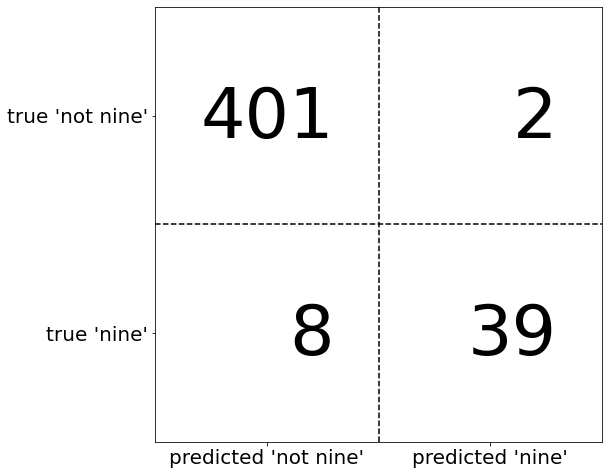

In [11]:
mglearn.plots.plot_confusion_matrix_illustration()

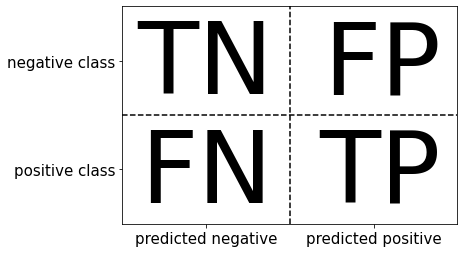

In [12]:
mglearn.plots.plot_binary_confusion_matrix()

In [13]:
print("Most frequent class: ")
print(confusion_matrix(y_test,pred_most_frequent))
print("\n Dummy model: ")
print(confusion_matrix(y_test,pred_dummy))
print("\n Decision tree model: ")
print(confusion_matrix(y_test,pred_tree))
print("\n Logestic Regression model: ")
print(confusion_matrix(y_test,pred_dummy))

Most frequent class: 
[[403   0]
 [ 47   0]]

 Dummy model: 
[[363  40]
 [ 43   4]]

 Decision tree model: 
[[390  13]
 [ 24  23]]

 Logestic Regression model: 
[[363  40]
 [ 43   4]]


## Accuracy is the number of correct prediction (TP and TN) divided by the number of all samples
### Accuracy = (TP+TN)/(TP+TN+FP+FN)
## Precision measures how many of the samples predicted as positive are actually positive. It is also known as positve predicted value
### Precision = (TP)/(TP+FP)
## Recall = measures how many of the positive samples are captured by the positive predictions. Also, known as sensitivity, hit rate or True positive rate
### Recall = (TP)/(TP+FN)
## F1-score: harmonic mean of precision and recall:
### F1=2.(precision.recall)/(precision+recall)

In [14]:
from sklearn.metrics import f1_score
print("f1 score most frequent : {:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("f1 score dummy model : {:.2f}".format(f1_score(y_test,pred_dummy)))
print("f1 score tree model : {:.2f}".format(f1_score(y_test,pred_tree)))
print("f1 score logreg model : {:.2f}".format(f1_score(y_test,pred_logreg)))

f1 score most frequent : 0.00
f1 score dummy model : 0.09
f1 score tree model : 0.55
f1 score logreg model : 0.88


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [16]:
print(classification_report(y_test,pred_dummy,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.89      0.90      0.90       403
        nine       0.09      0.09      0.09        47

    accuracy                           0.82       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.82      0.81       450



In [17]:
print(classification_report(y_test,pred_tree,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [18]:
print(classification_report(y_test,pred_logreg,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.98      0.99      0.99       403
        nine       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



In [20]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
X,y=make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.5).fit(X_train,y_train)

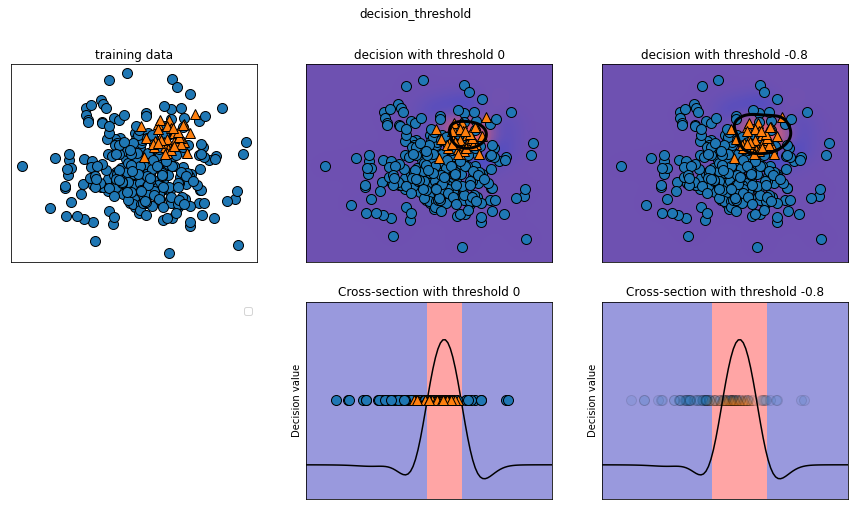

In [21]:
mglearn.plots.plot_decision_threshold()

In [22]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [26]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8

In [27]:
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



## Precision-recall curves and ROC curves
#### Often, when developing a new model, it is not entirely clear what the operating point will be. For this reason, and to understand a modeling problem better, it is instructive to look at all possible thresholds, or all possible trade-offs of precision and recalls at once. This is possible using a tool called the precision-recall curve.

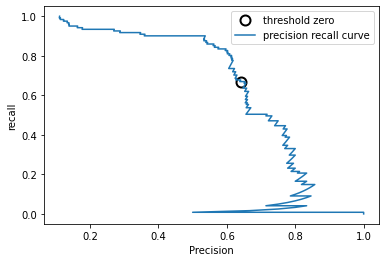

In [29]:
from sklearn.metrics import precision_recall_curve
X,y=make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
precision,recall, thresholds=precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='threshold zero',fillstyle="none",c='k',mew=2)

plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("recall")
plt.legend()
plt.show()

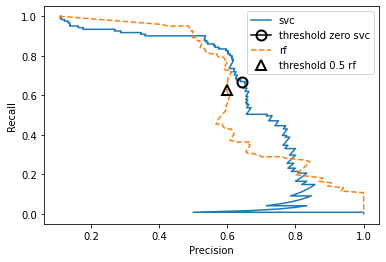

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

# RandomForestClassifier has predict_proba, but not decisionfunction
precision_rf, recall_rf, thresholds_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.plot(precision,recall,label='svc')
plt.plot(precision[close_zero],recall[close_zero],marker='o',markersize=10,label='threshold zero svc',fillstyle="none",c='k',mew=2)
plt.plot(precision_rf,recall_rf,label='rf',linestyle='--')
close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',markersize=10,label='threshold 0.5 rf',fillstyle='none',mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.show()

In [35]:
print("f1_scoe of random forest: {:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("fq_score of svc: {:.3f}".format(f1_score(y_test,svc.predict(X_test))))


f1_scoe of random forest: 0.610
fq_score of svc: 0.656


In [37]:
from sklearn.metrics import average_precision_score
ap_rf=average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test,svc.decision_function(X_test))

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of support vector: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of support vector: 0.666


## Receiver operating characeristics (ROC) and AUC
#### The ROC curve considers all possible threshold for a given classifier,its hsow false positve rate against the true positive rate.classification_report

### FPR=(FP/(FP+TN))

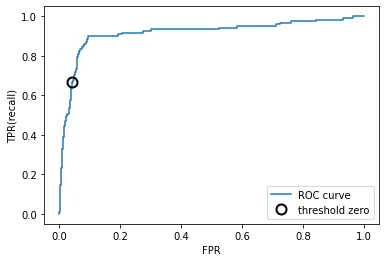

In [38]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds=roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='threshold zero',fillstyle="none",c='k',mew=2)
plt.legend(loc='best')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC for Random Forest: {:3f}".format(rf_auc))
print("AUC for SVC: {:3f}".format(svc_auc))

AUC for Random Forest: 0.936695
AUC for SVC: 0.916294


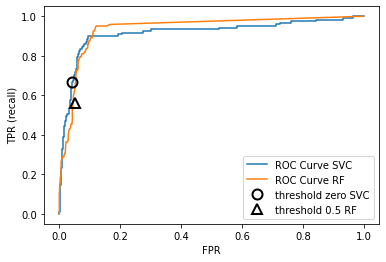

In [41]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


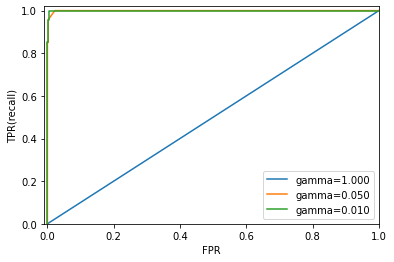

In [44]:
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
plt.figure()

for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr, tpr, _=roc_curve(y_test,svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label="gamma={:.3f}".format(gamma))

plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc="best")
plt.show()

## Metrics for Multiclass Classification

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)
print("Accuracy:{:.3f}".format(accuracy_score(y_test,pred)))
print("Confustion matrix:\n{}".format(confusion_matrix(y_test,pred)))

Accuracy:0.951
Confustion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


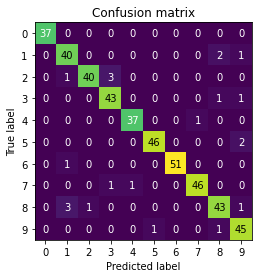

In [46]:
scores_image=mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel='Predicted label',ylabel='True label',xticklabels=digits.target_names,yticklabels=digits.target_names,cmap='viridis',fmt='%d')
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [48]:
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test,pred,average='micro')))
print('Macro average f1 score: {:.3f}'.format(f1_score(y_test,pred,average='macro')))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [49]:
#default scoring for classification is accuracy
from sklearn.model_selection import cross_val_score
print("Defualt scoring: {}".format(cross_val_score(SVC(),digits.data,digits.target==9,scoring='accuracy')))
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target==9,scoring='accuracy')
print('Explicit accuracy: {}'.format(explicit_accuracy))


Defualt scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy: [0.975      0.99166667 1.         0.99442897 0.98050139]
